In [48]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.
#After examining the data, found few missing values ​​and outliers, so no additional data cleaning was necessary. 
# Following is exploratory data analysis (EDA) to explore the relationships between different features.

In [49]:
# Load data
df = pd.read_csv('data/Students.csv')

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Study,3614.0,2.472883,1.107912,1.0,2.0,2.0,3.0,4.0
Daily_Usage_Hours,3614.0,2.559685,1.213319,0.5,1.5,2.6,3.6,5.0
Trust_in_AI_Tools,3614.0,3.023243,1.436934,1.0,2.0,3.0,4.0,5.0
Impact_on_Grades,3614.0,0.003320,2.370706,-5.0,-2.0,0.0,2.0,5.0
Awareness_Level,3614.0,5.828445,2.925481,1.0,3.0,6.0,8.0,10.0


In [51]:
# Fill missing values with a specific value （'Unknown' for categorical columns).
df_filled = df.copy()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df_filled[col] = df_filled[col].fillna('Unknown')

In [52]:
# Remove the column of Student_Name
df_model = df.drop( columns='Student_Name')
df_model.head(10)

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium
5,Kanya Mahavidyalaya,Commerce,2,Gemini,0.8,"Doubt Solving, Resume Writing",2,-2,Yes,Gemini,7,No,Punjab,Laptop,High
6,Shivalik Institute of Paramedical Technology,Medical,1,"ChatGPT, Gemini, Copilot",2.2,"Assignments, Coding Help",1,-1,Yes,Other,2,No,Chandigarh,Mobile,Medium
7,"Alpha College of Engineering & Technology, Pon...",Engineering,4,"ChatGPT, Copilot",2.4,"Exam Prep, Notes",2,-2,Yes,Copilot,5,Yes,Puducherry,Mobile,High
8,Jaipur Engineering College and Research Centre...,Engineering,4,"ChatGPT, Copilot",2.1,"MCQ Practice, Projects",2,-2,Yes,Copilot,8,Yes,Rajasthan,Laptop,Poor
9,"ICFAI University, Shillong",Commerce,2,Gemini,1.4,Content Writing,3,-2,No,Gemini,3,Yes,Meghalaya,Laptop,High


1. Correlation Bar Plot

In [53]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level'],
      dtype='object')
Categorical columns: Index(['Student_Name', 'College_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases',
       'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Willing_to_Pay_for_Access', 'State', 'Device_Used', 'Internet_Access'],
      dtype='object')


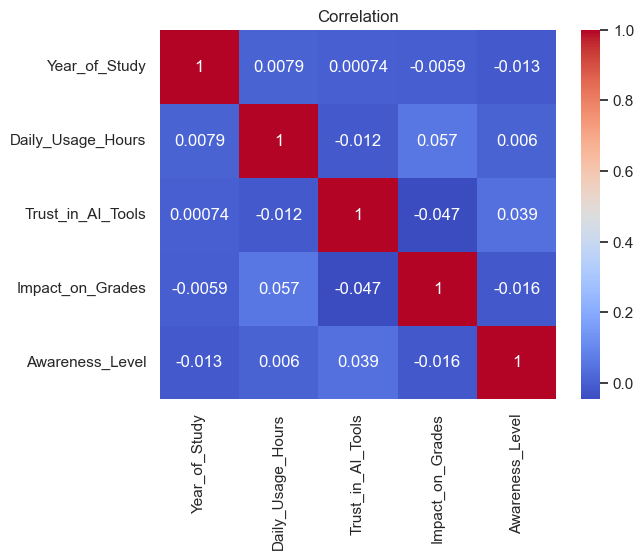

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

Insights
The correlation heatmap shows that in the sample, the relationship between Daily_Usage_Hours and its Impact_on_Grades is only very weakly positive (r≈0.06), and the linear correlation between other numerical variables and grade impact is close to 0.

<Axes: >

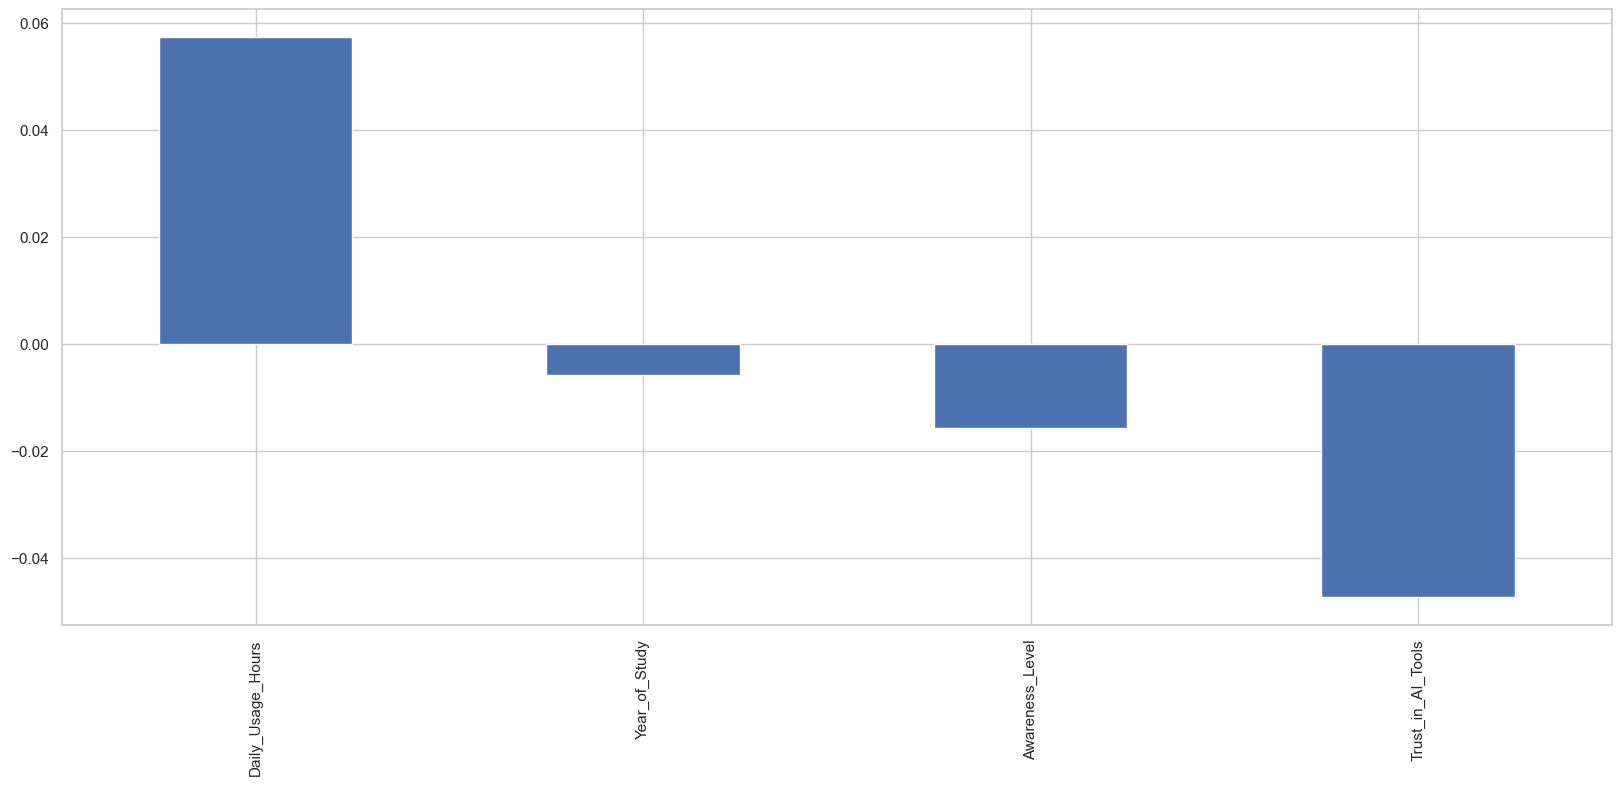

In [ ]:
# Bar plot of Correlation with 'Impact_on_Grades'
plt.figure(figsize=(20, 8))
df[numerical_columns].corr()['Impact_on_Grades'].drop('Impact_on_Grades').sort_values(ascending=False).plot(kind='bar')

Insights
In the overall sample, Daily_Usage_Hours showed a weak positive correlation with Impact_on_Grades (r≈0.06), and Trust_in_AI_Tools showed a weak negative correlation (r≈-0.045); other numerical features had correlations close to 0.

2. Pair Plot

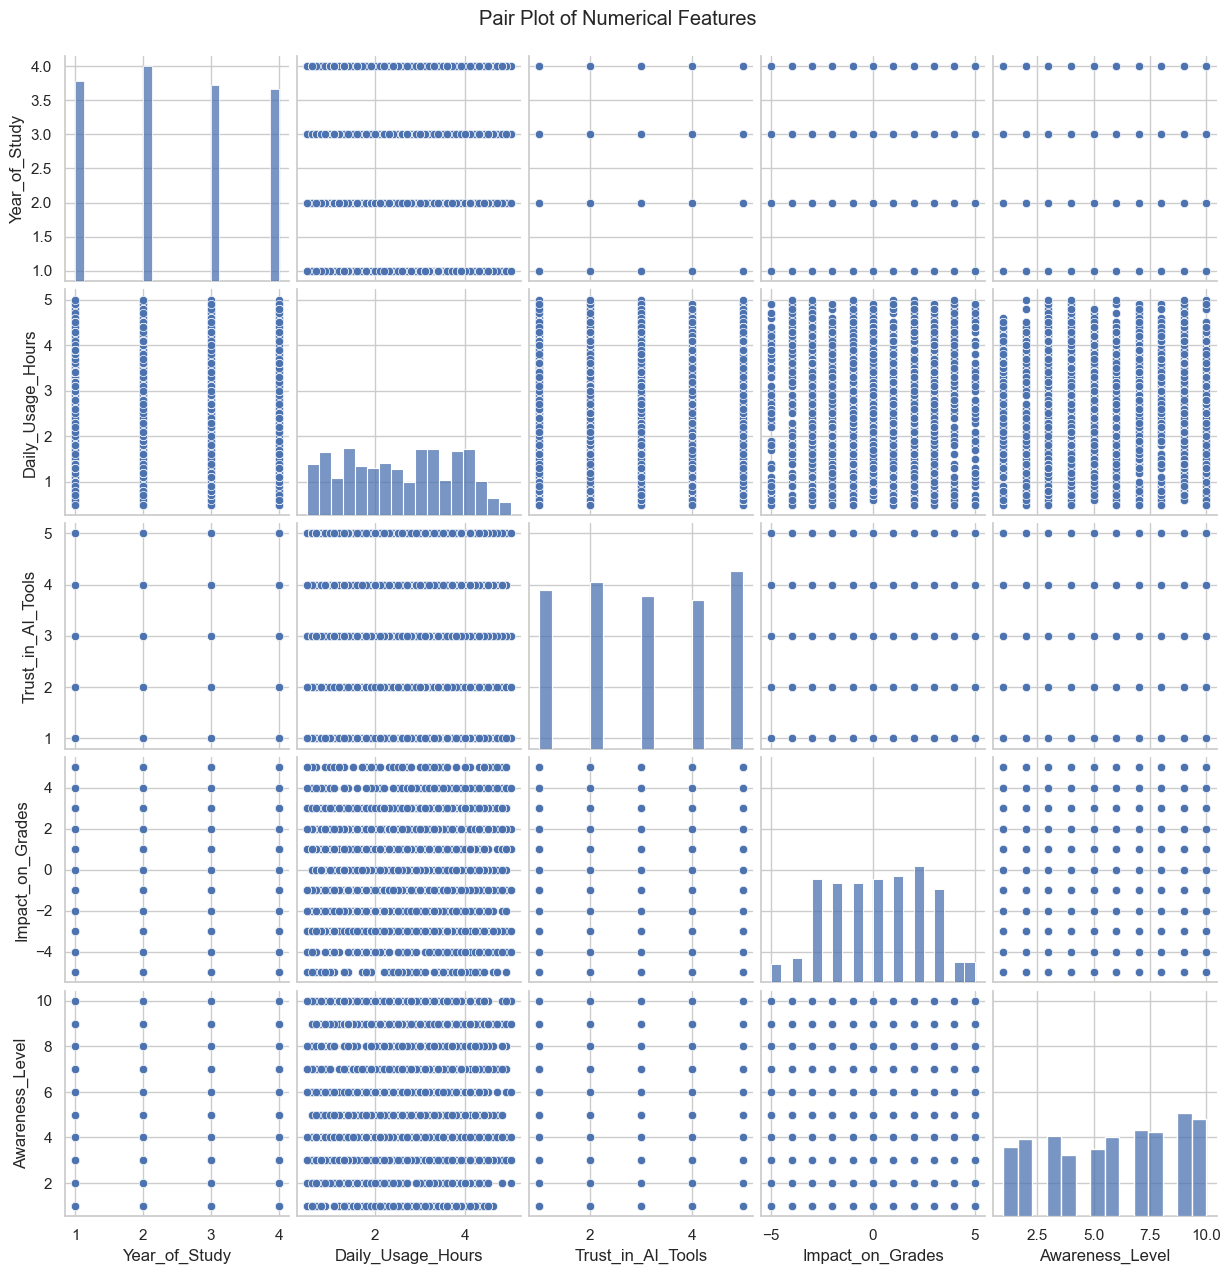

In [55]:
pair_plot = sns.pairplot(df[['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools','Impact_on_Grades', 'Awareness_Level']])
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

3. Line Plot

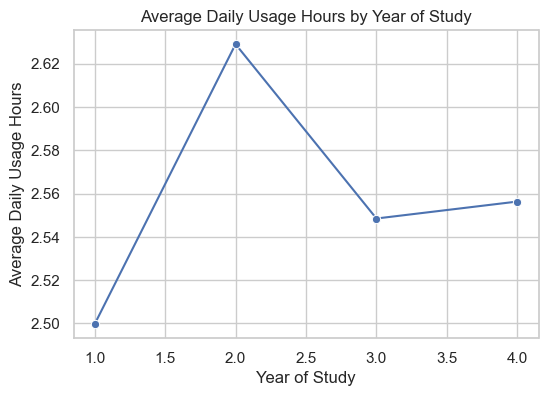

In [56]:
# As Year_of_study caculate Daily_Usage_Hours
usage_by_year = df.groupby('Year_of_Study')['Daily_Usage_Hours'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(data=usage_by_year, x='Year_of_Study', y='Daily_Usage_Hours', marker="o")
plt.title("Average Daily Usage Hours by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Average Daily Usage Hours")
plt.show()

Insights
1. Compared to first graders, second graders showed an increase in average AI tool usage time, from approximately 2.50 hours to 2.63 hours, indicating more frequent use of AI tools by second graders.
2. Third graders saw a decrease in average usage time compared to second graders, from 2.63 hours to around 2.55 hours, but their average usage time was still higher than that of first graders. 
3. Fourth graders showed a slight increase in usage time compared to third graders, rising from 2.55 hours to 2.56 hours. 
4. While the increase was small, it suggests that older students may rely on AI tools more often than third graders in certain situations.

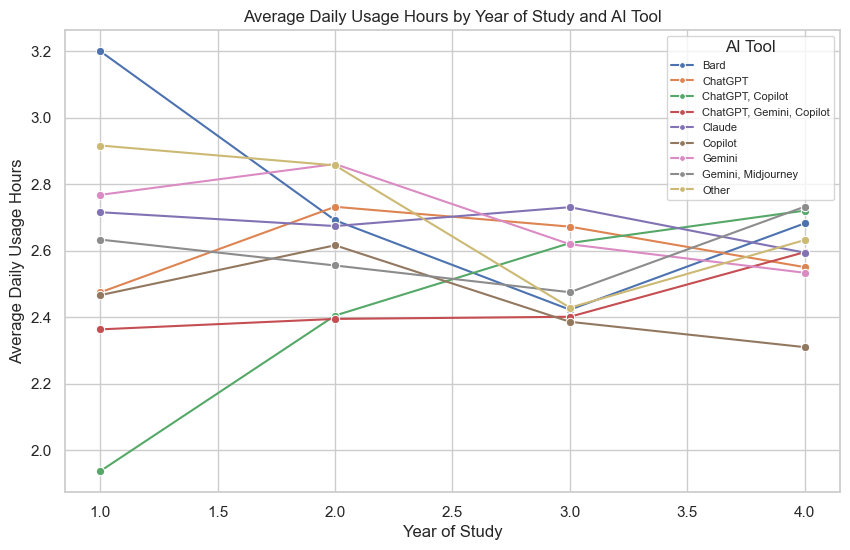

In [57]:
# Calculate the average Daily_Usage_Hours by Year_of_Stud + AI_Tools_Used 
usage_tool_year = df.groupby(['Year_of_Study','AI_Tools_Used'])['Daily_Usage_Hours'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=usage_tool_year, x='Year_of_Study', y='Daily_Usage_Hours', hue='AI_Tools_Used', marker="o")
plt.title("Average Daily Usage Hours by Year of Study and AI Tool")
plt.xlabel("Year of Study")
plt.ylabel("Average Daily Usage Hours")
plt.legend(title="AI Tool", loc="upper right", frameon=True,fontsize=8, markerscale=0.7)
plt.show()

Insights
1. The average daily usage time for most AI tools is concentrated between 2.3 and 2.9 hours, with relatively little variation. 
2. First-grade students showed greater differences in their usage of various AI tools compared to other grades.  
3. Except for Copilot, the average usage time for different AI tools narrowed as the grade level increased. The usage trend varied across different grades: some tools saw increased usage in higher grades, some decreased, some increased then decreased, and some decreased then increased.

4. Bard (blue line) had the highest usage time in first grade (approximately 3.2 hours/day), then decreased year by year, reaching its lowest point in third grade (approximately 2.4 hours), and slightly increased again in fourth grade (approximately 2.7 hours).
5. Copilot (brown line) showed a general downward trend, decreasing from 2.5 hours to 2.3 hours, indicating that older students used Copilot less.
Claude (red line) remained consistently between 2.3 and 2.4 hours, showing little change—a stable user base.
6. Gemini (pink line) showed an initial increase followed by a decrease, with the highest usage time in second grade (approximately 2.9 hours/day), then a significant decline.
7. Gemini + Midjourney (gray line): Usage time decreased from first to third grade, but increased in fourth grade, slightly exceeding first-grade levels.
8. ChatGPT + Copilot (green line): Lowest usage time in first grade (<2 hours), then increased year by year, reaching nearly 2.7 hours in fourth grade, becoming the second most used AI tool, slightly lower than Gemini + Midjourney.
9. ChatGPT + Gemini + Copilot (red line): Initially grew slowly, but usage time increased significantly in fourth grade.

10. Based on the chart trends, Gemini + Midjourney and ChatGPT + Copilot are more popular in higher grades, possibly due to increased task complexity.
11. Claude and Copilot, used individually, generally show an initial increase followed by a decrease, suggesting some students may have switched to other tools or combined tools.

4. Boxplot

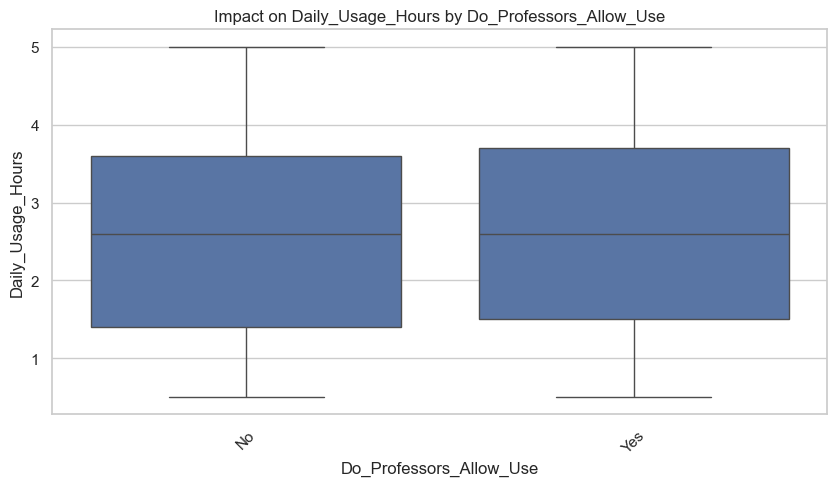

In [ ]:
# Analysis of the impact of allowing AI tools on  daily usage time.
plt.figure(figsize=(10,5))
sns.boxplot(x='Do_Professors_Allow_Use', y='Daily_Usage_Hours', data=df)
plt.xticks(rotation=45)
plt.title("Impact on Daily_Usage_Hours by Do_Professors_Allow_Use")
plt.show()

Insights
1. The median (50th percentile) is roughly the same for both groups; the average daily usage time for two type of students is similar. 
2. The "Yes" group has more students with higher usage times, resulting in a longer upper tail/right skew, thus "raising" the top of the box plot. 
3. Allowing AI tool use doesn't change the usage time of the "median student," but it increases the likelihood of having students with significantly longer usage times (a thicker right tail in the distribution). 
4. The IQR (box height) is similar for both groups; the overall difference is not significant.

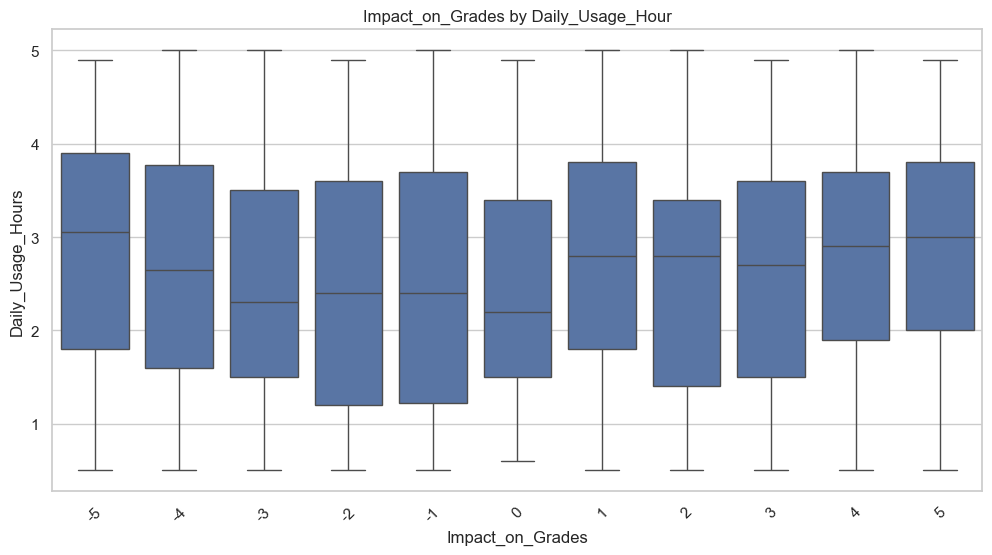

In [106]:
# Analysis of the impact of allowing AI tools on  daily usage time.
plt.figure(figsize=(12,6))
sns.boxplot(x='Impact_on_Grades', y='Daily_Usage_Hours', data=df)
plt.xticks(rotation=45)
plt.title("Impact_on_Grades by Daily_Usage_Hour")
plt.show()

1. The black lines for each category are all around 2–3 hours, showing little variation across different "impact ratings."
2. The box plots are higher for the extreme categories (e.g., +5, +4, and around -5), indicating a larger proportion of higher usage times in these groups.
3. Based solely on the grouped box plots, there is a weak correlation between "daily usage time" and "impact on grades."

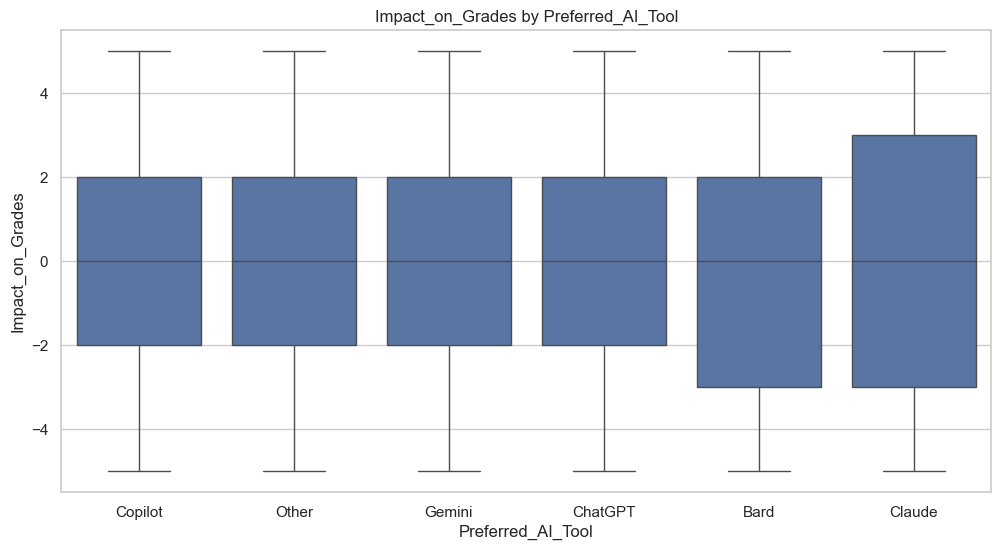

In [107]:
# Impact_on_Grades by Preferred_AI_Tool
plt.figure(figsize=(12,6))
sns.boxplot(x='Preferred_AI_Tool', y='Impact_on_Grades', data=df)
plt.title("Impact_on_Grades by Preferred_AI_Tool")
plt.show()

1. The median values ​​for Copilot, Other, Gemini, and ChatGPT are all around ≈0, indicating that users of these tools generally reported a neutral to slightly positive impact on their grades.
2. Bard's box plot is shifted downwards, with a median significantly < 0, suggesting that this group reported a more negative impact.
3. Claude's box plot is shifted upwards, with a median > 0 and a higher upper quartile, indicating a more positive impact reported by this group.
4. Most tools have a median close to 0 for "impact on grades"; Bard shows a slight negative bias, Claude a slight positive bias, but the overall difference is small.

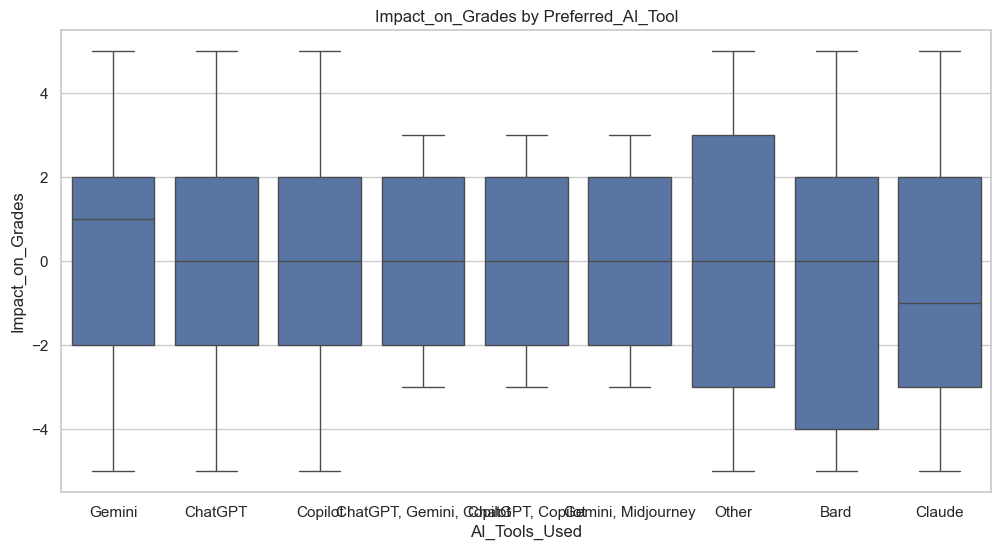

In [108]:
# Impact_on_Grades by AI_Tools_Used
plt.figure(figsize=(12,6))
sns.boxplot(x='AI_Tools_Used', y='Impact_on_Grades', data=df)
plt.title("Impact_on_Grades by Preferred_AI_Tool")
plt.show()

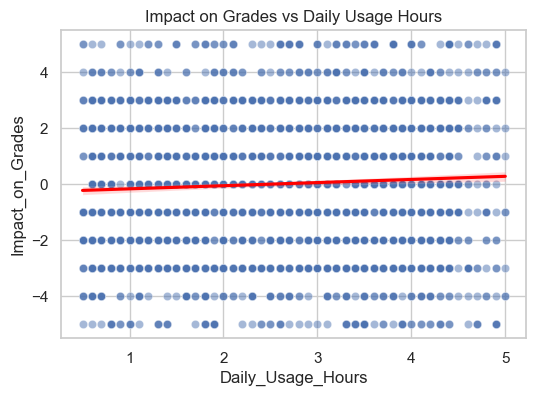

In [59]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Daily_Usage_Hours', y='Impact_on_Grades', data=df, alpha=0.5)
sns.regplot(x='Daily_Usage_Hours', y='Impact_on_Grades', data=df, scatter=False, color='red')
plt.title("Impact on Grades vs Daily Usage Hours")
plt.show()

Insights
1. Most data points are clustered between -2 and +2; extreme positive/negative values ​​(±4, ±5) are relatively rare, indicating that students generally perceive the impact of AI tools on grades as neutral to slightly positive. 
2. The regression line shows a slight upward trend, suggesting a weak positive correlation between usage time and perceived impact on grades. 
3. Students with longer usage times are more likely to believe that AI tools help their grades.
4. The scattered distribution of points indicates that usage time is not the only factor influencing perceived impact，students' usage methods, purposes, and whether their professor allowed AI use are likely important factors as well.

5. Histogram

In [96]:
df_temp = df[df['Daily_Usage_Hours']<6].copy()

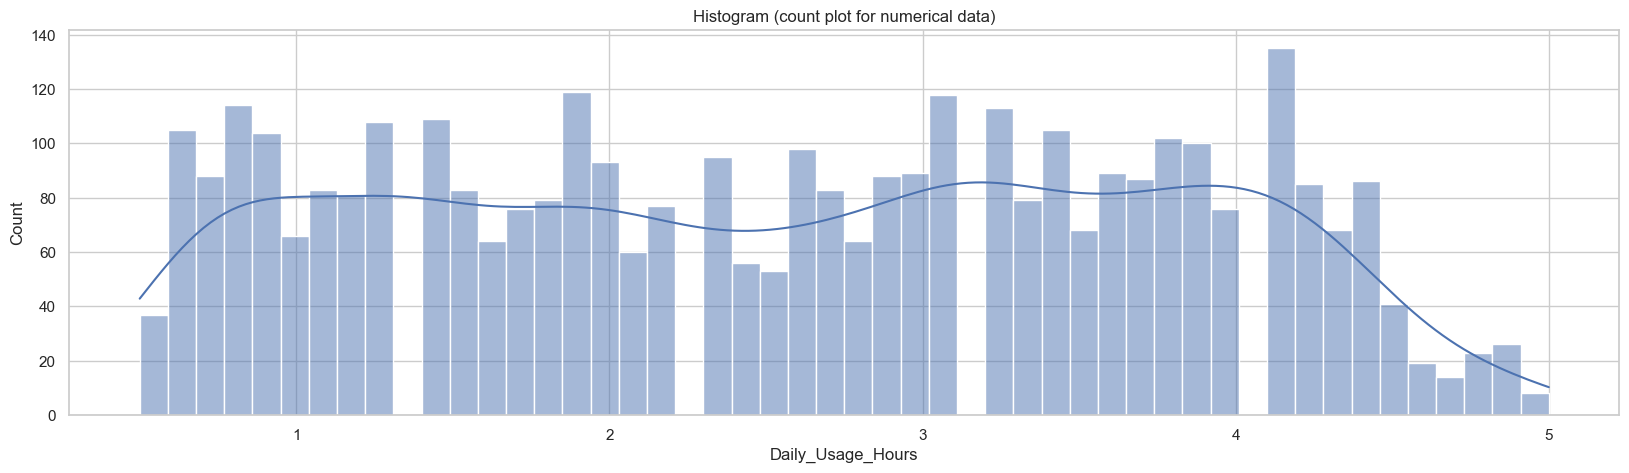

In [ ]:
# Histogram of Daily_Usage_Hours
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 5))

sns.histplot(df_temp['Daily_Usage_Hours'], bins=50, kde=True)
plt.title("Histogram (count plot for numerical data)")
plt.show()

Insights
1. Most students use AI tools for 1 to 4 hours daily. 
2. A small number of students use AI tools for over 4.5 hours daily. 
3. The distribution is clearly non-normal and appears bimodal, with peaks around 1 hour and 3.5–4 hours, possibly due to different subgroups within the data.

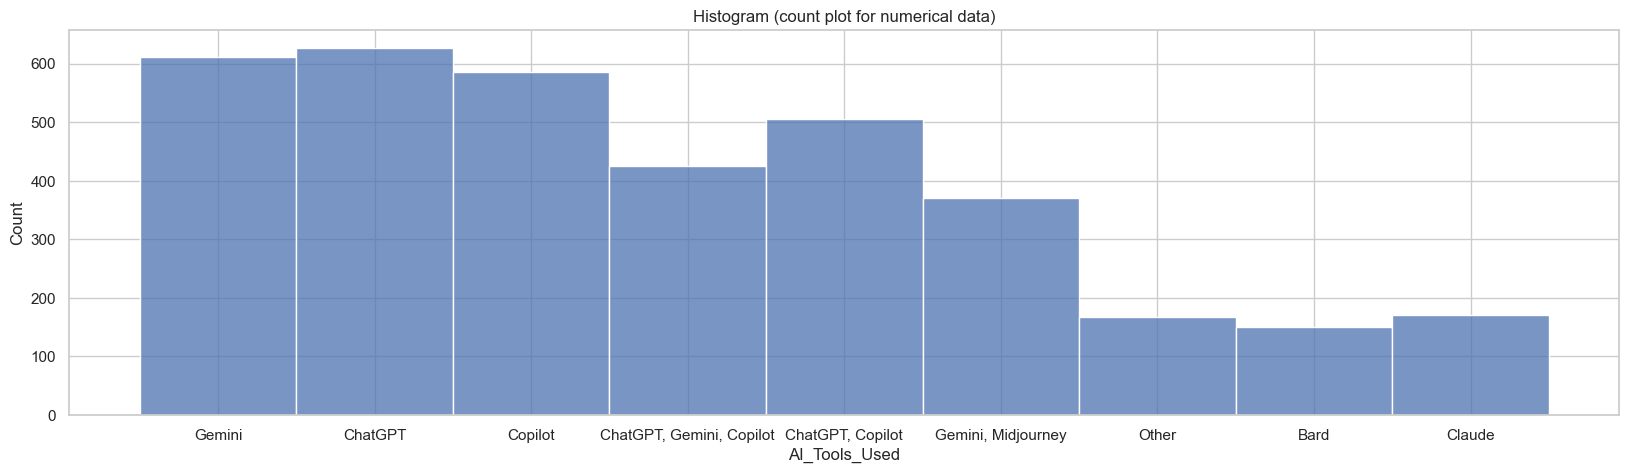

In [111]:
# Histogram of AI_Tools_Used
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 5))

sns.histplot(df_temp['AI_Tools_Used'], bins=50)
plt.title("Histogram (count plot for numerical data)")
plt.show()

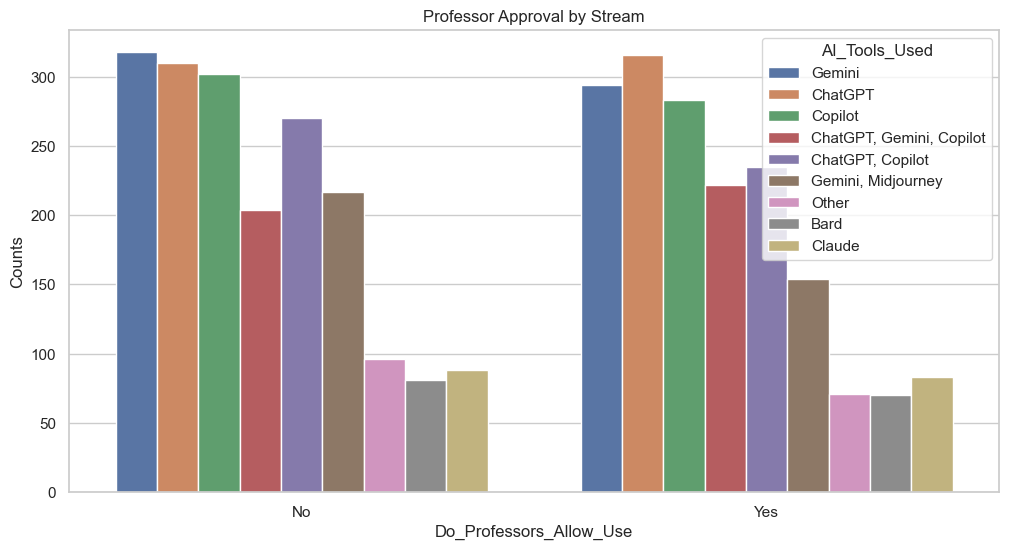

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Do_Professors_Allow_Use', hue='AI_Tools_Used')
plt.title("Professor Approval by Stream")
plt.ylabel("Counts")
plt.show()
plt.show()

6. KDE 

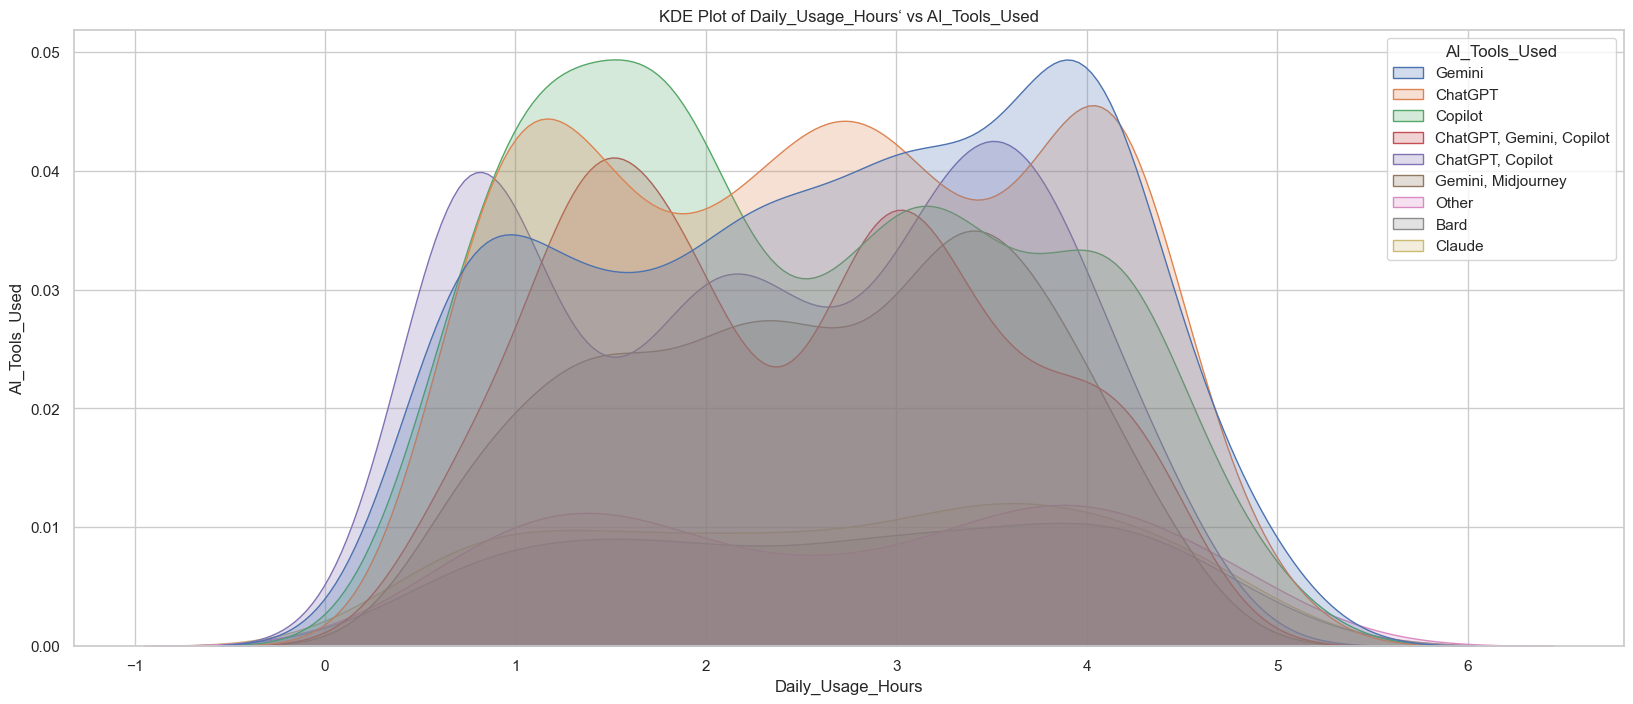

In [102]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.kdeplot(data=df, x='Daily_Usage_Hours', hue="AI_Tools_Used", fill=True, levels=15) 
plt.title('KDE Plot of Daily_Usage_Hours‘ vs AI_Tools_Used')
plt.xlabel('Daily_Usage_Hours')
plt.ylabel('AI_Tools_Used')
plt.show()